In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug = pd.read_csv(mouse_drug_data_to_load)

clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_drug, clinical_trial, how='left', on=['Mouse ID', 'Mouse ID'])

combined_df.head()

# Display the data table for preview


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
volume_df = combined_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

volume_df = pd.DataFrame(volume_df)

volume_df = volume_df.reset_index()

volume_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
new_error_vol = combined_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

new_error_vol = pd.DataFrame(new_error_vol)

new_error_vol = new_error_vol.reset_index()
new_error_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
volume_df = volume_df.reset_index()
volume_piv = volume_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

new_error_vol = new_error_vol.reset_index()
new_pivot = new_error_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

volume_piv.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


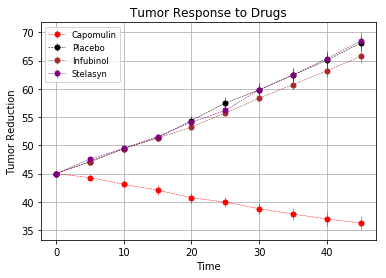

In [5]:
plt.errorbar(volume_piv.index, volume_piv['Capomulin'], yerr=new_pivot['Capomulin'], color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.5)
plt.errorbar(volume_piv.index, volume_piv['Placebo'], yerr=new_pivot['Placebo'], color='black', marker='o', markersize=5, linestyle='dashed', linewidth=0.5)
plt.errorbar(volume_piv.index, volume_piv['Infubinol'], yerr=new_pivot['Infubinol'], color='brown', marker='o', markersize=5, linestyle='dashed', linewidth=0.5)
plt.errorbar(volume_piv.index, volume_piv['Stelasyn'], yerr=new_pivot['Stelasyn'], color='purple', marker='o', markersize=5, linestyle='dashed', linewidth=0.5)


plt.title("Tumor Response to Drugs")
plt.xlabel('Time')
plt.ylabel('Tumor Reduction')
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid(True)


plt.show()

In [6]:
# Create DF for mean of Tumor Volume

the_mean = combined_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']

the_mean = pd.DataFrame(the_mean)

the_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
mean_sem = combined_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

mean_sem = pd.DataFrame(mean_sem)

mean_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
the_mean = the_mean.reset_index()
the_meanpiv = the_mean.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

mean_sem = mean_sem.reset_index()
mean_sempiv = mean_sem.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

the_meanpiv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


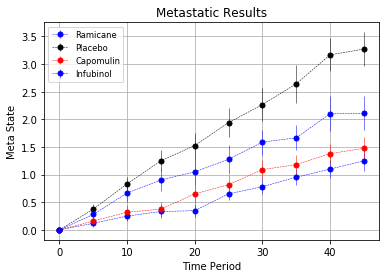

In [9]:
plt.errorbar(the_meanpiv.index, the_meanpiv['Ramicane'], yerr=mean_sempiv['Ramicane'], color='blue', marker='o', markersize=5, linestyle='dashed', linewidth=0.5)
plt.errorbar(the_meanpiv.index, the_meanpiv['Placebo'], yerr=mean_sempiv['Placebo'], color='black', marker='o', markersize=5, linestyle='dashed', linewidth=0.5)
plt.errorbar(the_meanpiv.index, the_meanpiv['Capomulin'], yerr=mean_sempiv['Capomulin'], color='red', marker='o', markersize=5, linestyle='dashed', linewidth=0.5)
plt.errorbar(the_meanpiv.index, the_meanpiv['Infubinol'], yerr=mean_sempiv['Infubinol'], color='blue', marker='o', markersize=5, linestyle='dashed', linewidth=0.5)


plt.title("Metastatic Results")
plt.xlabel('Time Period')
plt.ylabel('Meta State')
plt.grid(True)
plt.legend(loc='best', fontsize='small', fancybox=True)

## Tumor Response to Treatment

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

beyonce_did_me_dirty = combined_df.groupby(['Drug', 'Timepoint']).count()['Tumor Volume (mm3)']

# Convert to DataFrame

beyonce_did_me_dirty = pd.DataFrame({"Countdown": beyonce_did_me_dirty})

# Preview DataFrame

beyonce_did_me_dirty.head().reset_index()

,Drug,Timepoint,Countdown
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

beyonce_did_me_dirty = beyonce_did_me_dirty.reset_index()

beyonce_pivot = beyonce_did_me_dirty.pivot(index='Timepoint', columns='Drug')['Countdown']

# Convert to DataFrame

# Preview DataFrame

beyonce_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


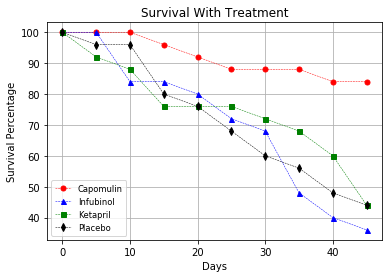

In [12]:
# Generate the Plot (with Error Bars)
plt.plot(100 * beyonce_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * beyonce_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * beyonce_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * beyonce_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=5, linewidth=0.50)
plt.title("Survival With Treatment")
plt.ylabel("Survival Percentage")
plt.xlabel("Days")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure

plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
tumor_change =  100 * (volume_piv.iloc[-1] - volume_piv.iloc[0]) / volume_piv.iloc[0]
tumor_change_sem =  100 * (new_pivot.iloc[-1] - new_pivot.iloc[0]) / new_pivot.iloc[0]

# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

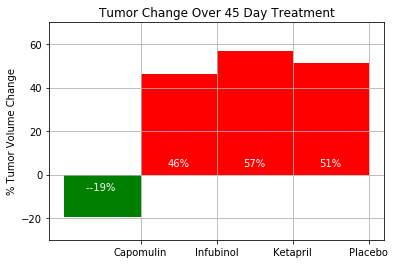

In [18]:
# Store all Relevant Percent Changes into a Tuple

pct_changes = (tumor_change["Capomulin"], 
               tumor_change["Infubinol"], 
               tumor_change["Ketapril"], 
               tumor_change["Placebo"])

# Splice the data between passing and failing drugs


fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")


# Call functions to implement the function calls

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Save the Figure

autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Show the Figure
fig.show()